In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow  as tf
import numpy as np
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from keras.layers import Dropout

In [ ]:
Data=pd.read_csv("gas_turbines.csv")

# EDA

In [ ]:
Data.head(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
5,7.6998,1010.7,92.708,3.5236,19.683,1059.8,549.97,114.72,10.626,3.4467,82.409
6,7.7901,1011.6,91.983,3.5298,19.659,1060.0,549.87,114.71,10.644,3.4874,82.440
7,7.7139,1012.7,91.348,3.5088,19.673,1059.8,549.92,114.71,10.656,3.6043,83.010
8,7.7975,1013.8,90.196,3.5141,19.634,1060.1,550.09,114.72,10.644,3.3943,82.284
9,8.0820,1015.0,88.597,4.0612,23.406,1083.0,550.21,131.70,11.679,1.9081,82.782


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
Data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [ ]:
Data.isnull().value_counts()

AT     AP     AH     AFDP   GTEP   TIT    TAT    TEY    CDP    CO     NOX  
False  False  False  False  False  False  False  False  False  False  False    15039
dtype: int64

In [ ]:
Data[Data.duplicated]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [ ]:
A = Data[["AT", "AP", "AH", "AFDP", "GTEP", "TIT", "TAT", "CDP", "CO", "NOX"]]
B = Data[["TEY"]]

### Visualization of dataset

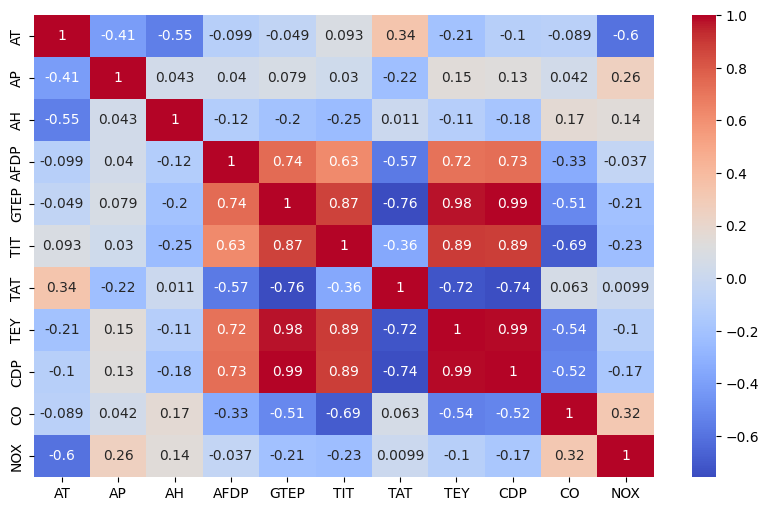

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(Data.corr(),annot=True,cmap='coolwarm')
plt.show()

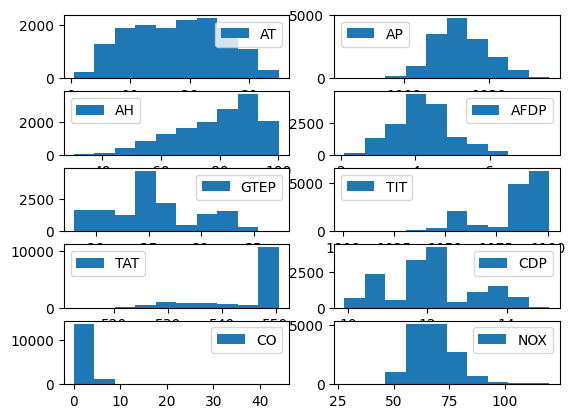

In [ ]:
axs = plt.subplots(5, 2)[1].flatten()

for i, ax in enumerate(axs):
    ax.hist(A.iloc[:, i], label=A.columns[i])
    ax.legend()

plt.show()

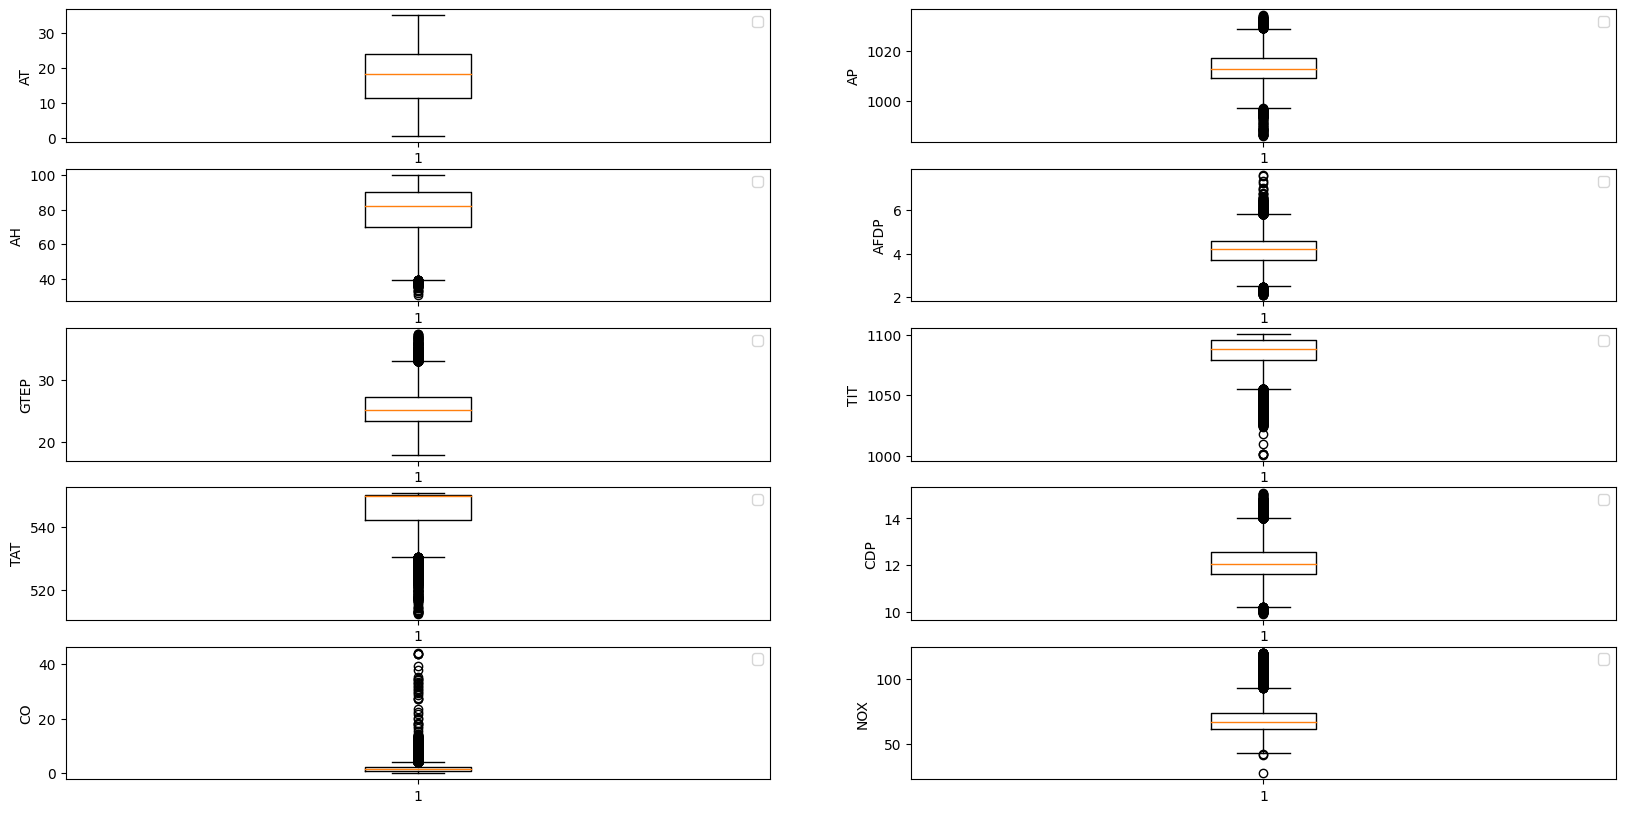

In [ ]:
fig,axs = plt.subplots(5, 2,figsize=(20, 10))
axs = axs.ravel()
for i, ax in enumerate(axs):

    ax.boxplot(A.iloc[:, i])
    ax.set_ylabel(A.columns[i])
    ax.legend()

plt.show()

# Standard Scaler

In [ ]:
scale=StandardScaler()
scaled_data=scale.fit_transform(Data)

In [ ]:
scaled_data=pd.DataFrame(scaled_data,columns=Data.columns)

In [ ]:
scaled_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


In [ ]:
X =scaled_data[["AT", "AP", "AH", "AFDP", "GTEP", "TIT", "TAT", "CDP", "CO", "NOX"]]
Y =scaled_data[["TEY"]]

In [ ]:
X.head(5)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591


In [ ]:
Y.head(5)

,TEY
0,-1.231172
1,-1.229909
2,-1.230541
3,-1.229909
4,-1.229909


## Train-Test Split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=42)

#MODEL building

In [ ]:
dropout_rate=0.2
activation_function = 'linear'
batch_size = 100
epochs = 100

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='linear'))
model.add(Dense(24, kernel_initializer='uniform', activation='relu'))
model.add(Dense(48,kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(24, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12,kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear'))

adam = Adam(learning_rate =0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
scores=model.evaluate(X,Y)

470/470 [==============================] - 1s 1ms/step - loss: 1.0000 - mean_squared_error: 1.0000


In [ ]:
history=model.fit(X_train,Y_train,batch_size=1000,epochs=1000,verbose=0,validation_data=(X_test, Y_test))

In [ ]:
#model.fit(X, Y, validation_split=0.33, epochs=50, batch_size=100)

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

In [ ]:
scores=model.evaluate(X,Y)

470/470 [==============================] - 1s 1ms/step - loss: 0.0016 - mean_squared_error: 0.0016


In [ ]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

mean_squared_error: 0.16%


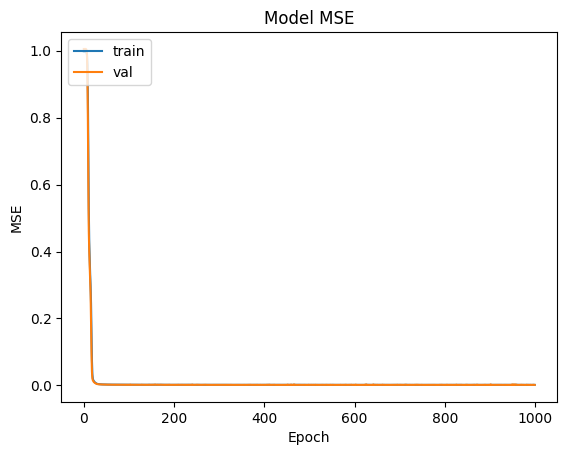

In [ ]:
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Model building by using Adam Optimizer

### Hyper Parameter Tuning for Number of neurons and hidden layesrs and learning rate

In [ ]:
layers=[2,3,4,5,8]
neurons = [8,10,15,25,36,54]
learning_rates = np.linspace(0.001, 0.1, 10)

In [ ]:
def create_model1(layers, neurons,learning_rate):
    model1 = Sequential()
    model1.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))


    for i in range(layers-1):
        model1.add(Dense(neurons, activation='relu'))
    model1.add(Dense(1, activation='linear'))


    adam = Adam(learning_rate = learning_rate)
    model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model1

In [ ]:
model1 = KerasClassifier(build_fn=create_model1, verbose=0)

<ipython-input-33-06473661806b>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model1 = KerasClassifier(build_fn=create_model1, verbose=0)


In [ ]:
parameters1=dict(layers=layers,neurons = neurons,learning_rate=learning_rates)

In [ ]:
grid1 = RandomizedSearchCV(estimator=model1, param_distributions=parameters1, cv=3, n_iter=10,random_state=42)

In [ ]:
grid_result1 = grid1.fit(X_train, Y_train)

In [ ]:
print('Best : {}, using {}'.format(grid_result1.best_score_,grid_result1.best_params_))

Best : 0.00022163119865581393, using {'neurons': 54, 'learning_rate': 0.034, 'layers': 5}


### Hyper parameter tuning for batch size and number of epochs

In [ ]:
epochs=[10,20,50]
batch_size=[50,100,200]

In [ ]:
def create_model2(epochs,batch_size):

    model2 = Sequential()
    model2.add(Dense(10, input_dim=X_train.shape[1], activation='relu',
                    kernel_initializer='uniform'))


    model2.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model2.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model2.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model2.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model2.add(Dense(54, activation='relu',kernel_initializer='uniform'))


    model2.add(Dense(1, activation='linear',kernel_initializer='uniform'))


    adam = Adam(learning_rate =0.034)
    model2.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mean_squared_error','accuracy'])
    return model2

In [ ]:
model2 = KerasClassifier(build_fn=create_model2, verbose=0)

<ipython-input-40-0c0a41208284>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn=create_model2, verbose=0)


In [ ]:
parameters2=dict(epochs=epochs,batch_size=batch_size)

In [ ]:
grid2 = GridSearchCV(estimator=model2, param_grid=parameters2, cv=KFold(),verbose=10)

In [ ]:
grid_result2 = grid2.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=50, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=50, epochs=10;, score=0.000 total time=   4.3s
[CV 2/5; 1/9] START batch_size=50, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=50, epochs=10;, score=0.000 total time=   5.3s
[CV 3/5; 1/9] START batch_size=50, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=50, epochs=10;, score=0.001 total time=   6.8s
[CV 4/5; 1/9] START batch_size=50, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=50, epochs=10;, score=0.000 total time=   5.9s
[CV 5/5; 1/9] START batch_size=50, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=50, epochs=10;, score=0.000 total time=   4.5s
[CV 1/5; 2/9] START batch_size=50, epochs=20....................................
[CV 1/5; 2/9] END .....batch_size=50, epochs=20;,

In [ ]:
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))

Best : 0.00011080332333222032, using {'batch_size': 50, 'epochs': 10}


In [ ]:
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

0.00011080332333222032,0.00022160664666444067 with {'batch_size': 50, 'epochs': 10}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 50, 'epochs': 20}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 50, 'epochs': 50}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 100, 'epochs': 10}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 100, 'epochs': 20}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 100, 'epochs': 50}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 200, 'epochs': 10}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 200, 'epochs': 20}
0.00011080332333222032,0.00022160664666444067 with {'batch_size': 200, 'epochs': 50}


## Hyper parameter tuning for Drop rate

In [ ]:
dropout_rate = [0.1,0.2]

In [ ]:
def create_model3(dropout_rate):

    model3 = Sequential()
    model3.add(Dense(10, input_dim=X_train.shape[1], activation='relu',
                    kernel_initializer='uniform'))


    model3.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model3.add(Dropout(dropout_rate))
    model3.add(Dense(54, activation='relu',kernel_initializer='uniform'))
    model3.add(Dropout(dropout_rate))


    model3.add(Dense(1, activation='linear',kernel_initializer='uniform'))


    adam = Adam(learning_rate =0.034)
    model3.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mean_squared_error','accuracy'])
    return model3

In [ ]:
model3 = KerasClassifier(build_fn = create_model3,epochs=10,batch_size=50,verbose = 0)

<ipython-input-48-170ab2db251c>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model3 = KerasClassifier(build_fn = create_model3,epochs=10,batch_size=50,verbose = 0)


In [ ]:
paramgrids3=dict(dropout_rate = dropout_rate)

In [ ]:
grid3= GridSearchCV(estimator = model3,param_grid = paramgrids3,cv = KFold(),verbose = 10)
grid_result3 = grid3.fit(X_train,Y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START dropout_rate=0.1............................................
[CV 1/5; 1/2] END .............dropout_rate=0.1;, score=0.000 total time=   7.0s
[CV 2/5; 1/2] START dropout_rate=0.1............................................
[CV 2/5; 1/2] END .............dropout_rate=0.1;, score=0.000 total time=   6.0s
[CV 3/5; 1/2] START dropout_rate=0.1............................................
[CV 3/5; 1/2] END .............dropout_rate=0.1;, score=0.001 total time=   7.0s
[CV 4/5; 1/2] START dropout_rate=0.1............................................
[CV 4/5; 1/2] END .............dropout_rate=0.1;, score=0.000 total time=   5.7s
[CV 5/5; 1/2] START dropout_rate=0.1............................................
[CV 5/5; 1/2] END .............dropout_rate=0.1;, score=0.000 total time=   7.1s
[CV 1/5; 2/2] START dropout_rate=0.2............................................
[CV 1/5; 2/2] END .............dropout_rate=0.2;,

In [ ]:
print('Best : {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))

Best : 0.00011080332333222032, using {'dropout_rate': 0.1}


In [ ]:
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))


0.00011080332333222032,0.00022160664666444067 with {'dropout_rate': 0.1}
0.00011080332333222032,0.00022160664666444067 with {'dropout_rate': 0.2}


## Hyperparameter Tuning for Activation Function and Kernel Initializer

In [ ]:
activation= ['relu', 'tanh', 'sigmoid','linear']
init = ['uniform','normal','zero']

In [ ]:
param_grids4 = dict(activation=activation,kernel_initializer=init)

In [ ]:
dropout_rate=0.1
learning_rate= 0.034
layers=5
neurons=54
epochs=10
batch_size=50

In [ ]:
def create_model4(activation,kernel_initializer):

    dropout_rate=0.1
    model4 = Sequential()
    model4.add(Dense(10, input_dim=X_train.shape[1], activation=activation,
                    kernel_initializer=kernel_initializer))


    model4.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model4.add(Dropout(dropout_rate))
    model4.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model4.add(Dropout(dropout_rate))
    model4.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model4.add(Dropout(dropout_rate))
    model4.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model4.add(Dropout(dropout_rate))
    model4.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model4.add(Dropout(dropout_rate))

    model4.add(Dense(1, activation='linear',kernel_initializer='uniform'))


    adam = Adam(learning_rate =0.034)
    model4.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mean_squared_error','accuracy'])
    return model4

In [ ]:
model4 = KerasClassifier(build_fn = create_model4,epochs=10,batch_size=50,verbose = 0)

<ipython-input-57-d97a5654709e>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model4 = KerasClassifier(build_fn = create_model4,epochs=10,batch_size=50,verbose = 0)


In [ ]:
grid4 = GridSearchCV(estimator = model4,param_grid = param_grids4,cv = KFold(),verbose = 10)
grid_result4 = grid4.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation=relu, kernel_initializer=uniform................
[CV 1/5; 1/12] END activation=relu, kernel_initializer=uniform;, score=0.000 total time=   5.8s
[CV 2/5; 1/12] START activation=relu, kernel_initializer=uniform................
[CV 2/5; 1/12] END activation=relu, kernel_initializer=uniform;, score=0.000 total time=   5.0s
[CV 3/5; 1/12] START activation=relu, kernel_initializer=uniform................
[CV 3/5; 1/12] END activation=relu, kernel_initializer=uniform;, score=0.001 total time=   6.3s
[CV 4/5; 1/12] START activation=relu, kernel_initializer=uniform................
[CV 4/5; 1/12] END activation=relu, kernel_initializer=uniform;, score=0.000 total time=   7.2s
[CV 5/5; 1/12] START activation=relu, kernel_initializer=uniform................
[CV 5/5; 1/12] END activation=relu, kernel_initializer=uniform;, score=0.000 total time=   7.1s
[CV 1/5; 2/12] START activation=relu, kernel_initializ

In [ ]:
print('Best : {}, using {}'.format(grid_result4.best_score_,grid_result4.best_params_))

Best : 0.00011080332333222032, using {'activation': 'relu', 'kernel_initializer': 'uniform'}


In [ ]:
means4 = grid_result4.cv_results_["mean_test_score"]
stds4 = grid_result4.cv_results_["std_test_score"]
params4 = grid_result4.cv_results_["params"]
for mean4,stdev4,param4 in zip(means4,stds4,params4):
    print("{},{} with {}".format(mean4,stdev4,param4))

0.00011080332333222032,0.00022160664666444067 with {'activation': 'relu', 'kernel_initializer': 'uniform'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'relu', 'kernel_initializer': 'normal'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'relu', 'kernel_initializer': 'zero'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'tanh', 'kernel_initializer': 'uniform'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'tanh', 'kernel_initializer': 'normal'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'tanh', 'kernel_initializer': 'zero'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'sigmoid', 'kernel_initializer': 'uniform'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'sigmoid', 'kernel_initializer': 'normal'}
0.00011080332333222032,0.00022160664666444067 with {'activation': 'sigmoid', 'kernel_initializer': 'zero'}
0.00011080332333222032,0.000221606646664

# Final Model

In [ ]:
dropout_rate=0.1
learning_rate= 0.034
layers=5
neurons=54
kernel_initializer='uniform'
activation='relu'
epochs=10
batch_size=50

In [ ]:
    dropout_rate=0.1
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation=activation,
                    kernel_initializer=kernel_initializer))

    model.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(54, activation=activation,kernel_initializer=kernel_initializer))
    model.add(Dropout(dropout_rate))



    model.add(Dense(1, activation='linear',kernel_initializer='uniform'))


    adam = Adam(learning_rate =0.034)
    model.compile(loss='mean_squared_error', optimizer='adam',  metrics=['mean_squared_error','accuracy'])

#### Train the model and store the history

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=50, validation_data=(X_test, Y_test))

Epoch 1/10
181/181 [==============================] - 3s 6ms/step - loss: 0.4447 - mean_squared_error: 0.4447 - accuracy: 0.0000e+00 - val_loss: 0.0085 - val_mean_squared_error: 0.0085 - val_accuracy: 0.0000e+00
Epoch 2/10
181/181 [==============================] - 1s 6ms/step - loss: 0.0340 - mean_squared_error: 0.0340 - accuracy: 0.0000e+00 - val_loss: 0.0102 - val_mean_squared_error: 0.0102 - val_accuracy: 0.0000e+00
Epoch 3/10
181/181 [==============================] - 1s 5ms/step - loss: 0.0299 - mean_squared_error: 0.0299 - accuracy: 0.0000e+00 - val_loss: 0.0089 - val_mean_squared_error: 0.0089 - val_accuracy: 0.0000e+00
Epoch 4/10
181/181 [==============================] - 1s 4ms/step - loss: 0.0258 - mean_squared_error: 0.0258 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_mean_squared_error: 0.0048 - val_accuracy: 0.0000e+00
Epoch 5/10
181/181 [==============================] - 1s 5ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - accuracy: 0.0000e+00 - val_loss: 0.0071 

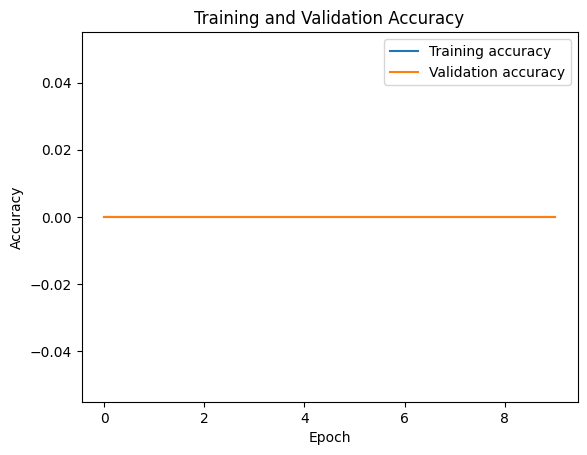

In [ ]:
# Plot training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show plot
plt.show()

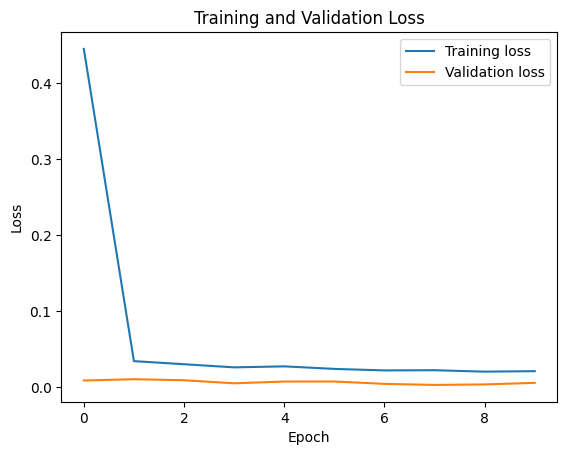

In [ ]:
# Plot training and validation loss curves
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show plot
plt.show()

# Visualization

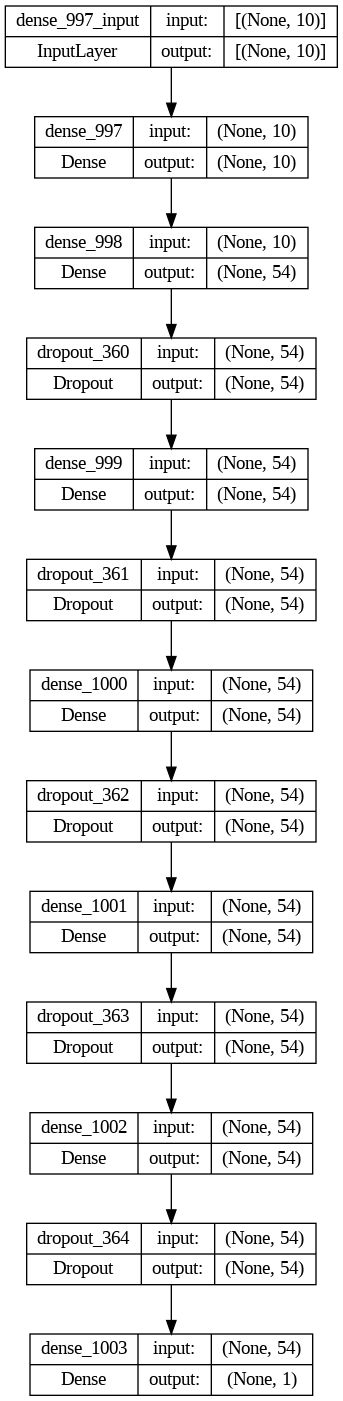

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='modelf.png', show_shapes=True)

### Visualization using ann_visualizer

In [ ]:
!pip install ann_visualizer

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=bcd43be2c957d9b8cca428fa96f2f9d6942ed4525cb7c773a0c3eae62c8e3fbf
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
from ann_visualizer.visualize import ann_viz
import graphviz

In [ ]:
ann_viz(model,filename='Gasturbinefinal.gv',title='Gasturbine Nueral networks')

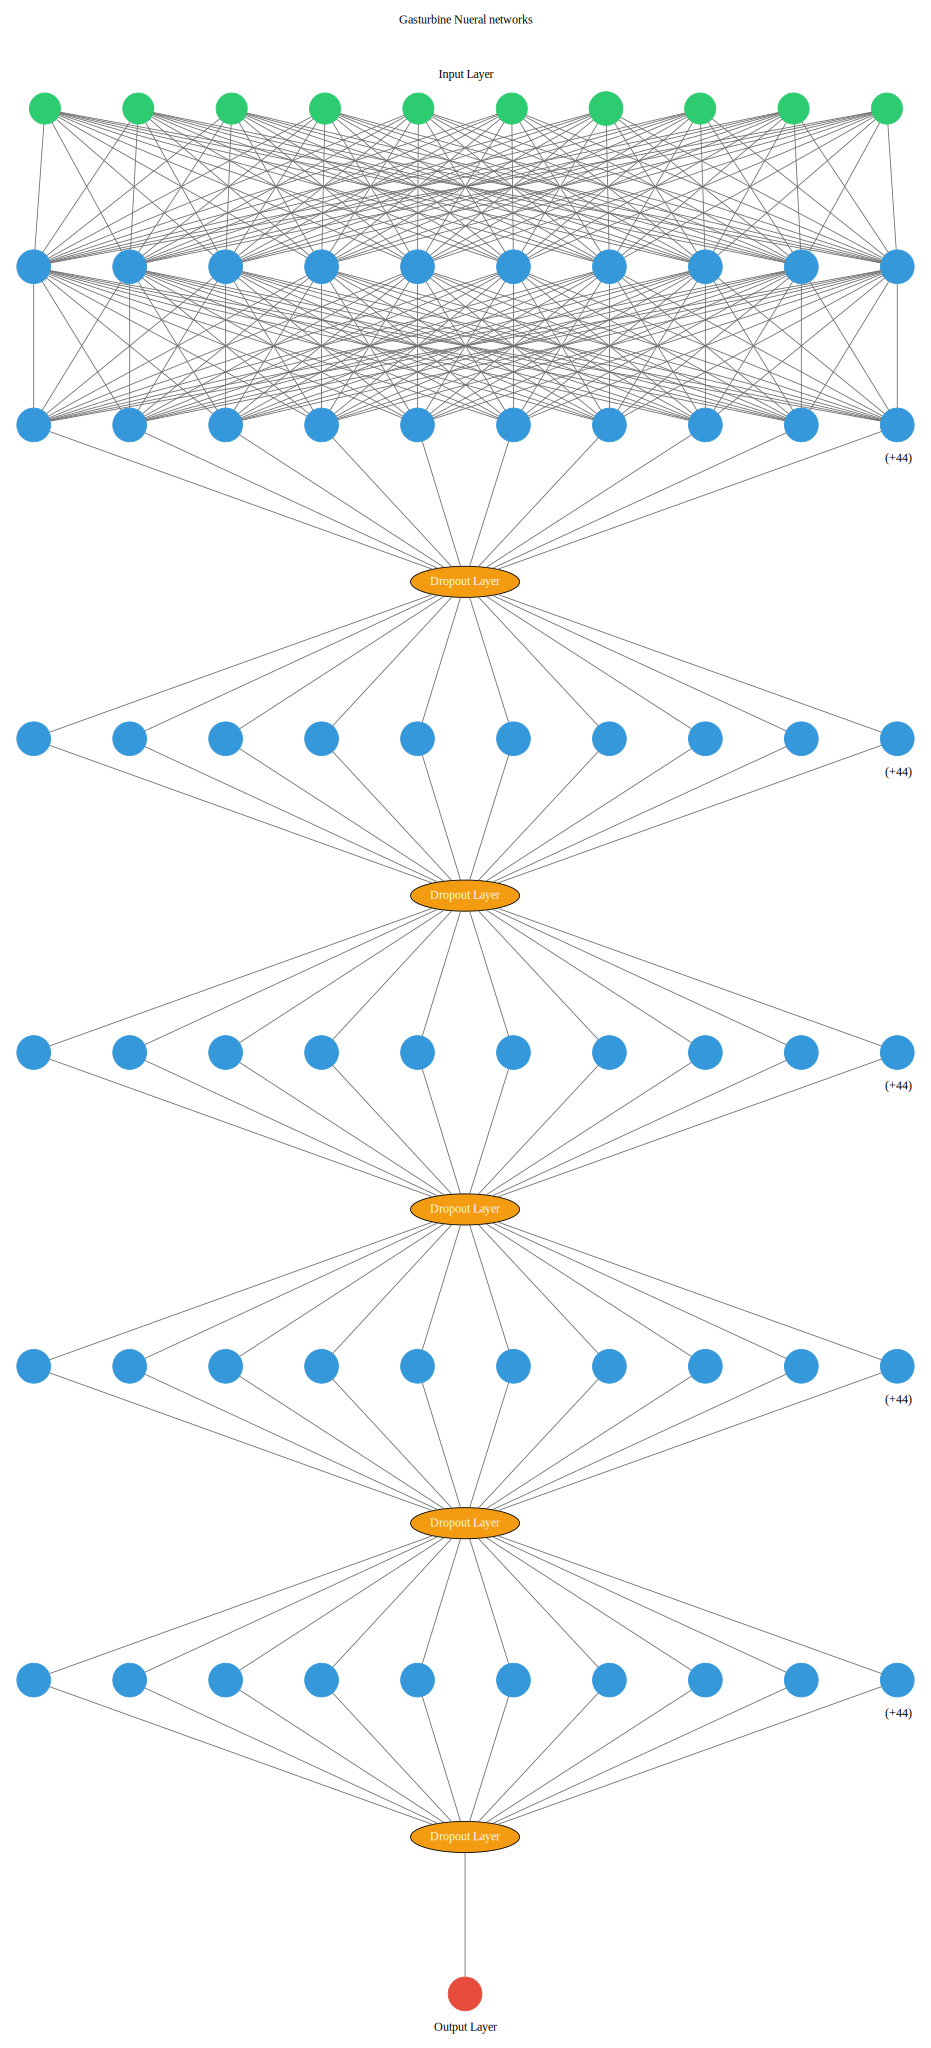

In [ ]:
graph_file=graphviz.Source.from_file('Gasturbinefinal.gv')
graph_file